# 서울시 CCTV 데이터 분석 프로젝트

## 1. 데이터 불러오기

In [213]:
import pandas as pd
import numpy as np

In [214]:
seoul_cctv = pd.read_csv('../data/01_Seoul_CCTV.csv')
#comma seperated values
# ,로 구분한 값들
# 데이터 까보면 ,로 구분되어있음

In [215]:
seoul_cctv.tail(1)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
24,중랑구,916,509,121,177,109


In [216]:
# df 컬럼이름 바꿔주는 방법
seoul_cctv.rename(columns={'기관명':'구별'}, inplace=True)  # .rename(columns={'':''})

In [217]:
seoul_cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [218]:
pop_seoul = pd.read_excel('../data/01_Seoul_Population.xls',header = 2, usecols = 'B, D, G, J, N')  # header 2번째부터 불러오겠다는 의미, usecols'사용하고자하는 컬럼들'
pop_seoul

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953
6,동대문구,366011,350647,15364,55718
7,중랑구,412780,408226,4554,59262
8,성북구,455407,444055,11352,66251
9,강북구,328002,324479,3523,56530


In [219]:
# 자치구 - > 계
# 계 -> 인구수
# 계.1 -> 한국인
# 계.2 -> 외국인
# 65세이상고령자 -> 고령자

In [220]:
pop_seoul.tail(1)

,자치구,계,계.1,계.2,65세이상고령자
25,강동구,440359,436223,4136,56161


In [221]:
pop_seoul.rename(columns={
    pop_seoul.columns[0]:'구별',
    pop_seoul.columns[1]:'인구수',
    pop_seoul.columns[2]:'한국인',
    pop_seoul.columns[3]:'외국인',
    pop_seoul.columns[4]:'고령자'
    }, inplace=True) # 덮어쓴다.

In [222]:
# 오름차순 또는 내림차순 정렬.
# df의 차순정렬은 sort_value(by='', ascending = )
pop_seoul.sort_values(by = '인구수', ascending = False).head(6)

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
24,송파구,671173,664496,6677,76582
16,강서구,608255,601691,6564,76032
23,강남구,561052,556164,4888,65060
11,노원구,558075,554403,3672,74243
21,관악구,520929,503297,17632,70046


In [223]:
# 가로 첫번째줄 삭제
pop_seoul.drop(0,axis=0, inplace=True)

In [212]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [47]:
seoul_cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [48]:
1292+430+584+932

3238

In [49]:
seoul_cctv['최근증가율'] = (seoul_cctv['소계'] - seoul_cctv['2013년도 이전']) / seoul_cctv['2013년도 이전'] * 100

In [50]:
# 최근 증가율이 가장 낮은 구는 어디인가요?
seoul_cctv.sort_values(by = '최근증가율')

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
18,양천구,2482,1843,142,30,467,34.671731
13,서대문구,1254,844,50,68,292,48.578199
20,용산구,2096,1368,218,112,398,53.216374
5,광진구,878,573,78,53,174,53.228621
14,서초구,2297,1406,157,336,398,63.371266
16,성북구,1651,1009,78,360,204,63.627354
6,구로구,1884,1142,173,246,323,64.973730
10,동대문구,1870,1070,23,198,579,74.766355
24,중랑구,916,509,121,177,109,79.960707
15,성동구,1327,730,91,241,265,81.780822


In [51]:
pop_seoul['외국인비율'] = pop_seoul['외국인']/pop_seoul['인구수']*100
pop_seoul['고령자비율'] = pop_seoul['고령자']/pop_seoul['인구수']*100

In [52]:
# 고령자비율이 가장 적은 곳은 어디인가요?
pop_seoul.sort_values(by = '외국인비율', ascending=True)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
11,노원구,558075,554403,3672,74243,0.657976,13.303409
15,양천구,475018,471154,3864,55234,0.813443,11.627770
23,강남구,561052,556164,4888,65060,0.871220,11.596073
12,은평구,491202,486794,4408,74559,0.897390,15.178888
25,강동구,440359,436223,4136,56161,0.939234,12.753458
22,서초구,445401,441102,4299,53205,0.965198,11.945415
24,송파구,671173,664496,6677,76582,0.994825,11.410173
9,강북구,328002,324479,3523,56530,1.074079,17.234651
16,강서구,608255,601691,6564,76032,1.079153,12.500021


In [53]:
data_result = pd.merge(seoul_cctv,pop_seoul,how='inner',on='구별') # how inner (교집합),#on 구별(기준열)

In [54]:
data_result.drop('2016년',axis=1, inplace=True)
# 두개이상 삭제하고 싶으면 리스트로 묶어주면 된다.
# data_result.drop(['2014년', '2015년', '2016년'], axis=1, inplace=True)

In [55]:
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [191]:
data_result['cctv 비율'] = data_result['소계']/data_result['인구수']*100

In [192]:
data_result.sort_values(by='cctv 비율')

,소계,2013년도 이전,2014년,2015년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차,cctv 비율
구별,,,,,,,,,,,,,,
강서구,911,388,258,184,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578,0.149773
송파구,1081,529,21,68,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628,0.161061
중랑구,916,509,121,177,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645,0.221910
강동구,1010,379,99,155,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322,0.229358
광진구,878,573,78,53,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527,0.235833
도봉구,825,238,159,42,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861,0.238278
강북구,831,369,120,138,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923,0.253352
마포구,980,314,118,169,212.101911,385783,374915,10868,49615,2.817128,12.860857,0.254029,-513.977895,0.254029
노원구,1566,542,57,451,188.929889,558075,554403,3672,74243,0.657976,13.303409,0.280607,-119.490564,0.280607


In [194]:
# 구별을 인덱스화
data_result.set_index('구별', inplace=True)

KeyError: "None of ['구별'] are in the columns"

In [195]:
len(data_result)

25

In [196]:
data_result['인구수']
# 한컬럼 = 시리즈
# 시리즈는 인덱스와 값이 나옴
# 인덱스를 구별로 바꿔서 이러케 나오는거

구별
강남구     561052
강동구     440359
강북구     328002
강서구     608255
관악구     520929
광진구     372298
구로구     441559
금천구     253491
노원구     558075
도봉구     346234
동대문구    366011
동작구     408493
마포구     385783
서대문구    325028
서초구     445401
성동구     312711
성북구     455407
송파구     671173
양천구     475018
영등포구    402024
용산구     244444
은평구     491202
종로구     164257
중구      134593
중랑구     412780
Name: 인구수, dtype: int64

In [197]:
# 한글용 그래프
!pip install koreanize_matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [198]:
import koreanize_matplotlib

In [199]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'  # 화질업
%matplotlib inline  # 쥬피터에서 사용하는 그래프

UsageError: unrecognized arguments: # 쥬피터에서 사용하는 그래프


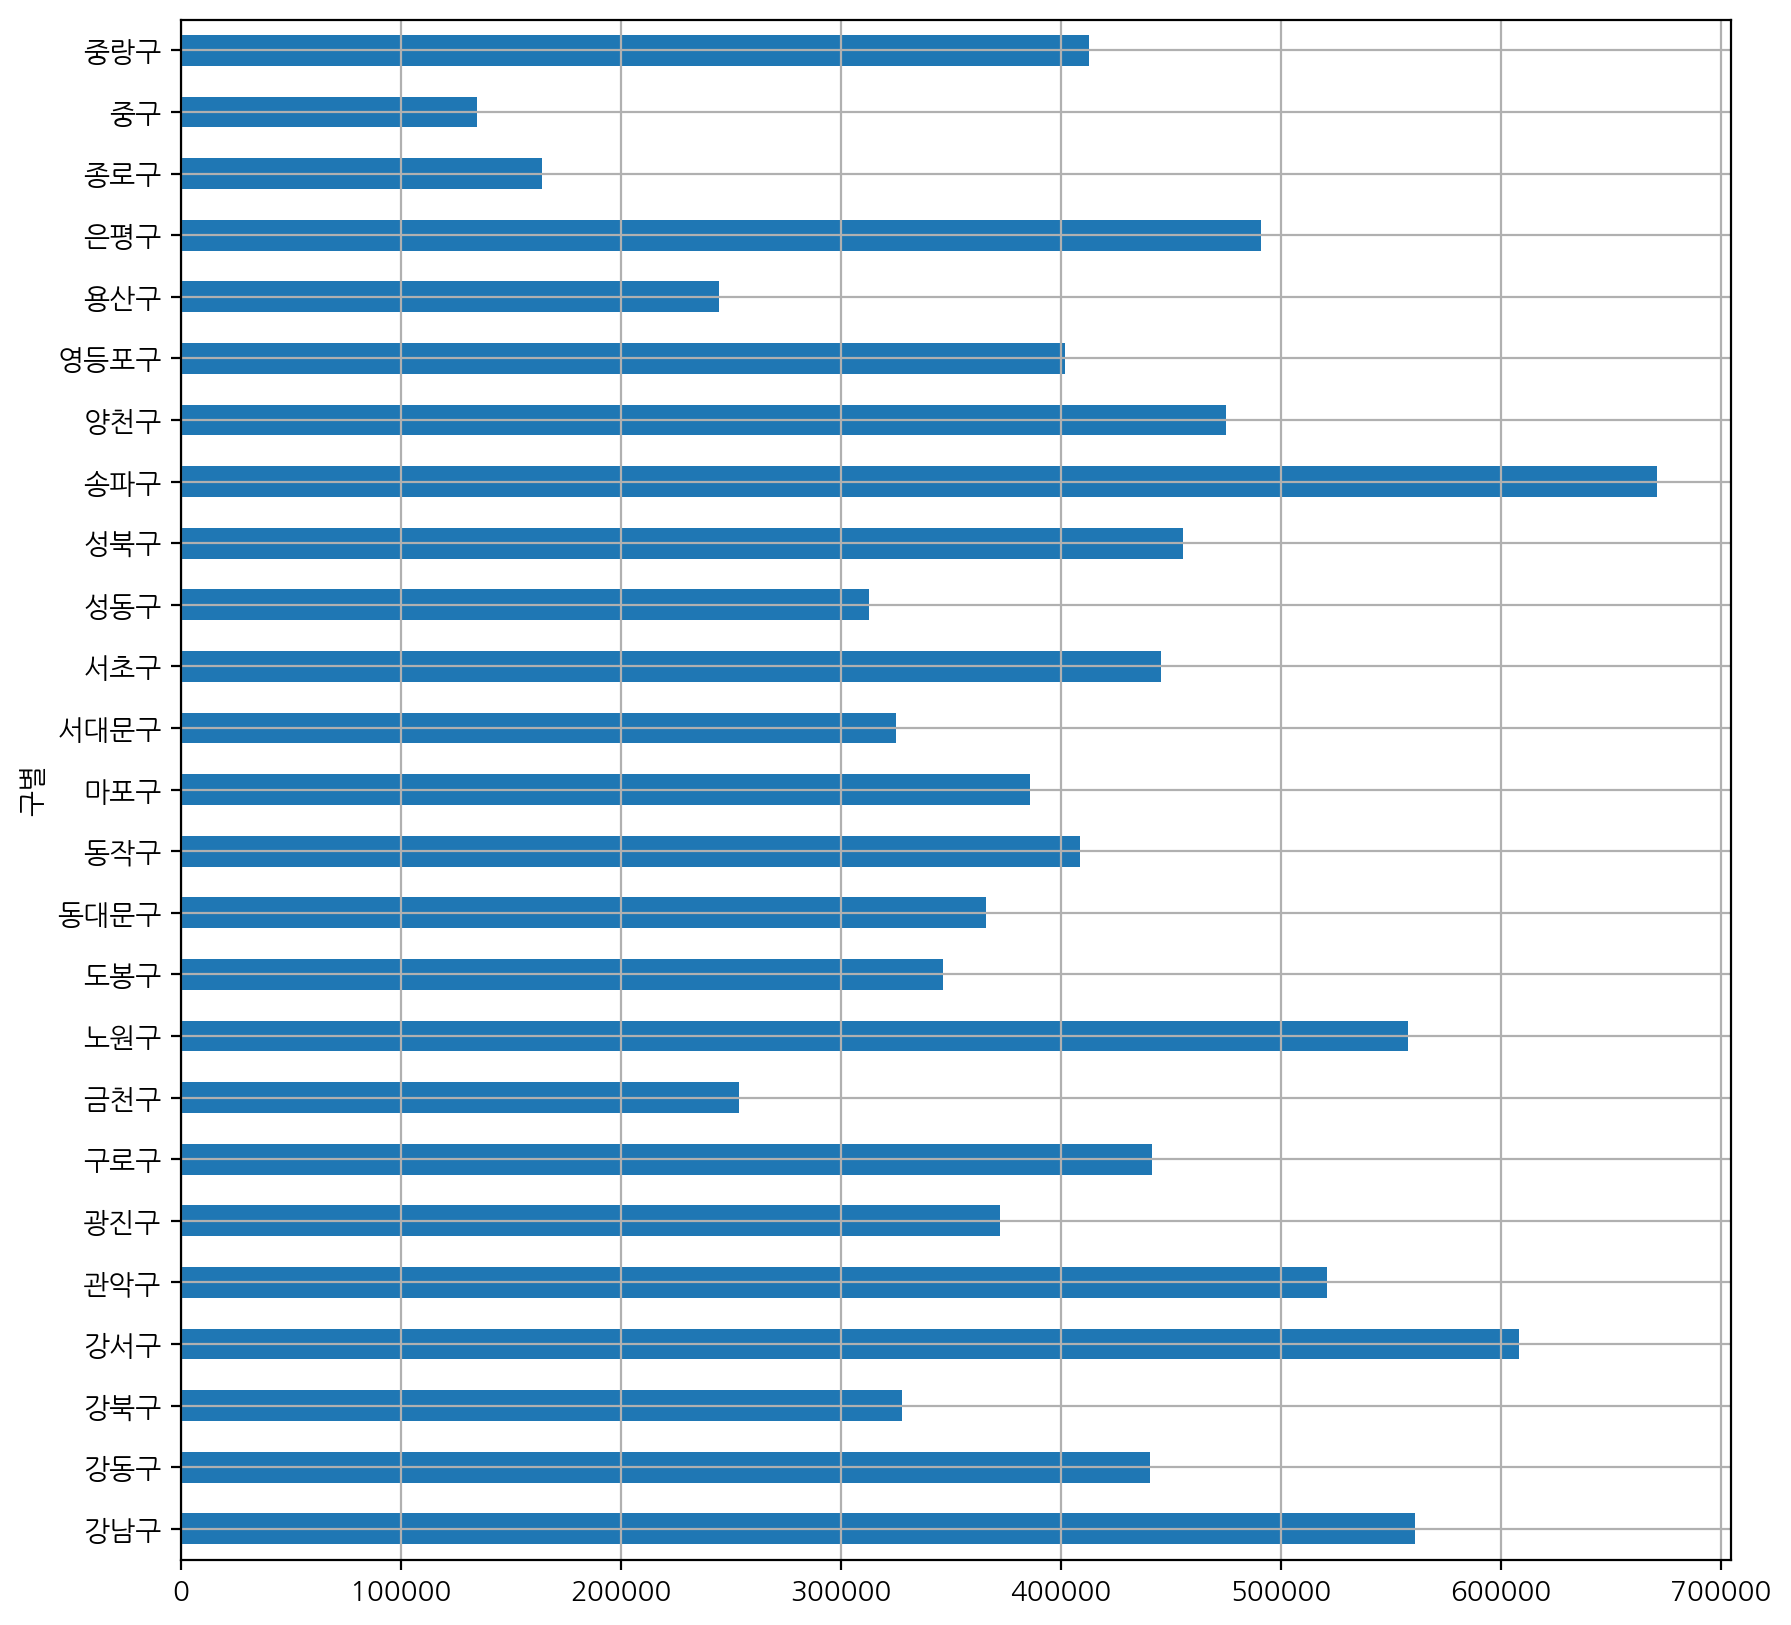

In [64]:
data_result['인구수'].plot(kind='barh', grid= True, figsize=(10, 10));

In [66]:
data_result.head(1)

,소계,2013년도 이전,2014년,2015년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,,,,
강남구,3238,1292,430,584,150.619195,561052,556164,4888,65060,0.87122,11.596073,0.57713


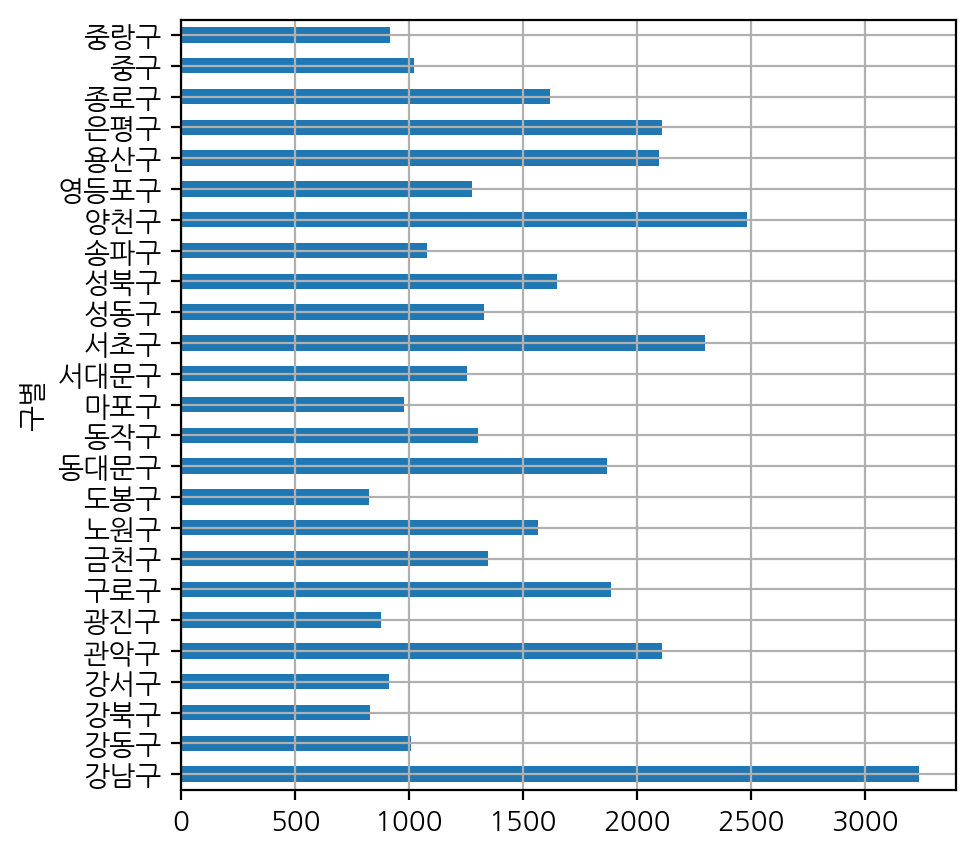

In [70]:
data_result['소계'].plot(kind='barh', grid= True, figsize=(5, 5));  # 쉼표 붙여야 내부 결과 같이 안나온다.

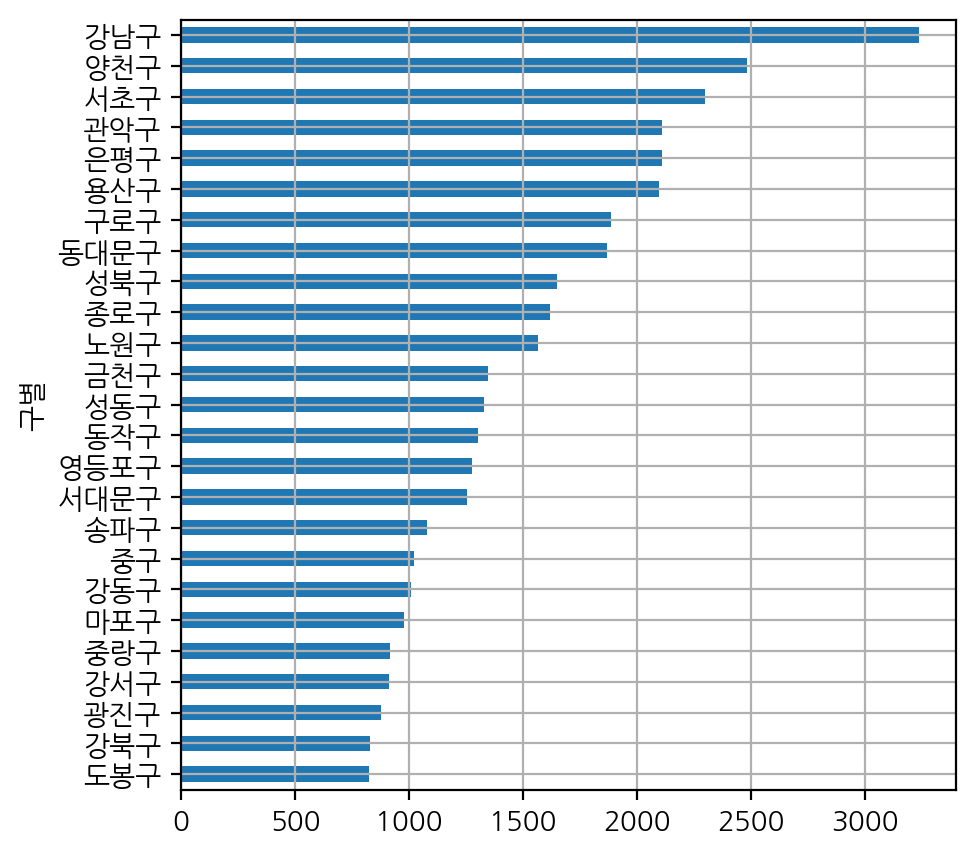

In [71]:
data_result['소계'].sort_values().plot(kind='barh', grid= True, figsize=(5, 5)); # 순서대로 정렬

그래프 크기는 14,10
x 축 인구수
y축 cctv 갯수
scatter(점 그래프)

제목에는 '인구수 대비 cctv 갯수'
x 축에는 '인구수'
y 축에는 'cctv'

In [105]:

plt.figure(figsize=(14, 10)
plt.scatter(data_result["인구수"])
plt.scatter(data_result["인구수"])
plt.scatter(data_result["cctv 갯수"])
plt.figure(figsize=(14,10)) # 도화지
plt.plot(data_result) # 그림
plt.show();

SyntaxError: '(' was never closed (287771421.py, line 1)

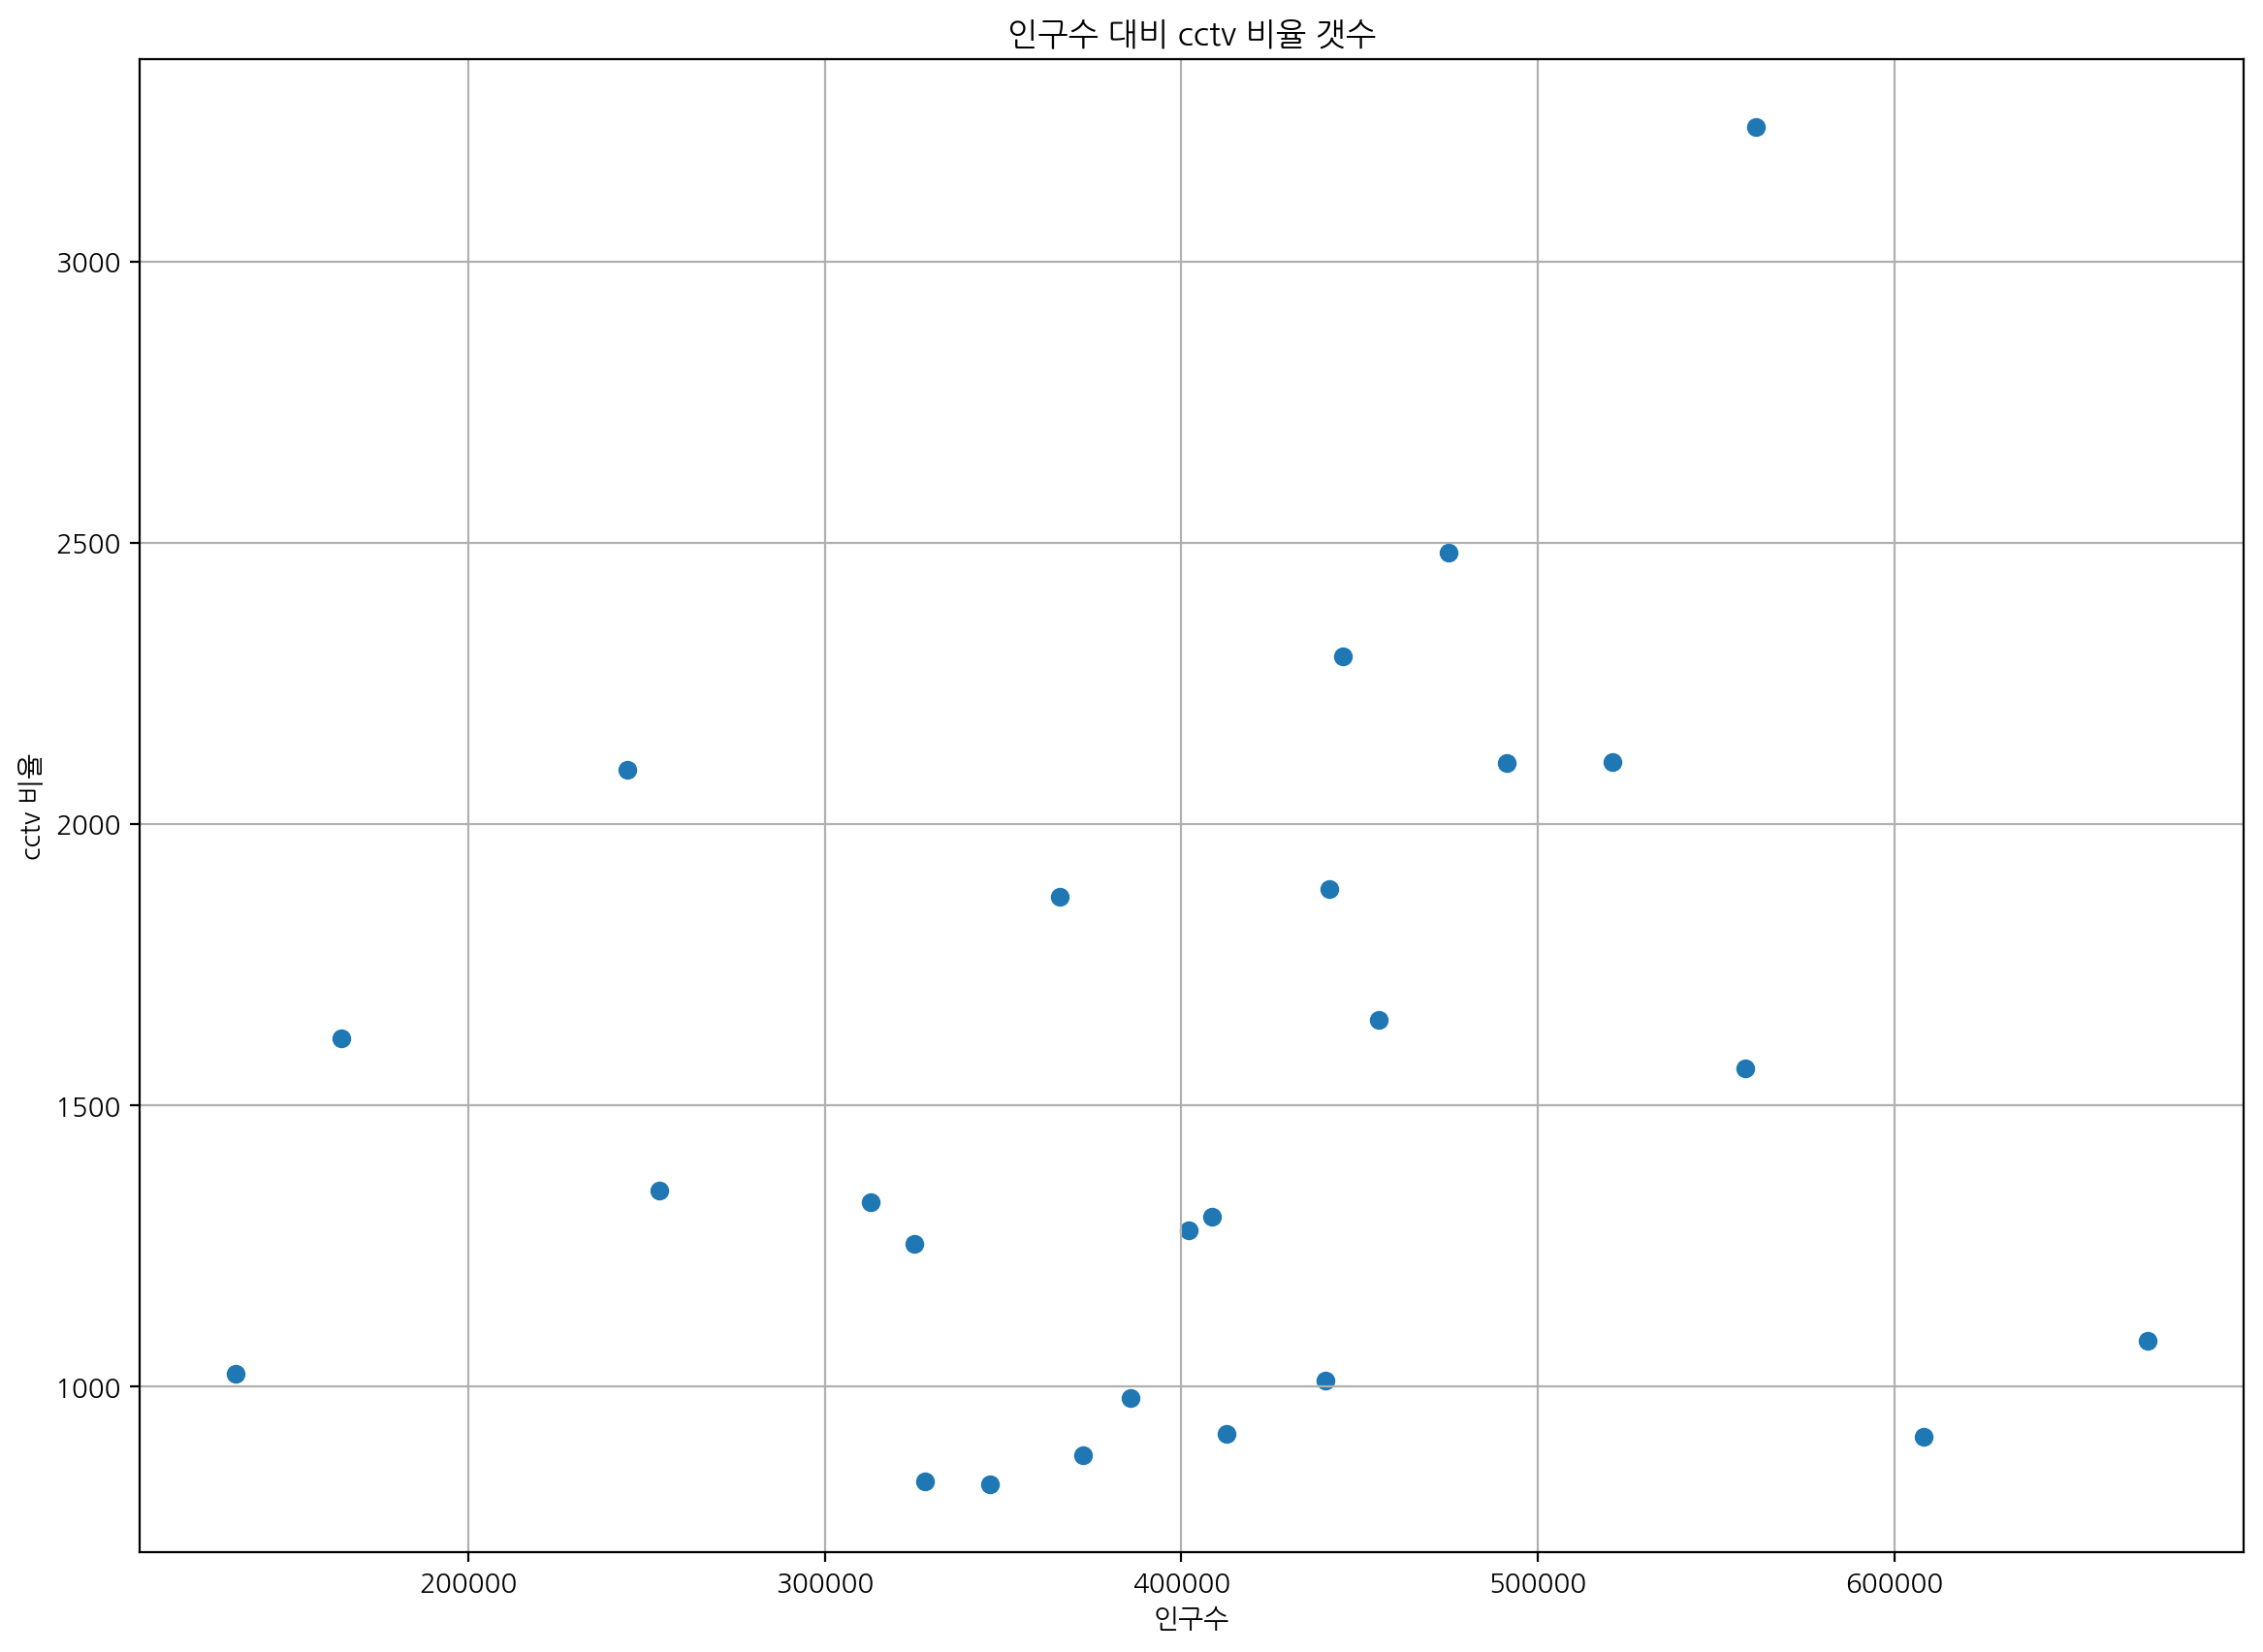

In [202]:

plt.figure(figsize=(14,10))
x_datas = data_result['인구수']
y_datas = data_result['cctv비율']
plt.title('인구수 대비 cctv 비율 갯수')

plt.scatter(x,y)
plt.xlabel('인구수')
plt.ylabel('cctv 비율')
plt.grid()
plt.show();

In [203]:
data_result

,소계,2013년도 이전,2014년,2015년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차,cctv 비율
구별,,,,,,,,,,,,,,
강남구,3238,1292,430,584,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326,0.577130
강동구,1010,379,99,155,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322,0.229358
강북구,831,369,120,138,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923,0.253352
강서구,911,388,258,184,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578,0.149773
관악구,2109,846,260,390,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395,0.404854
광진구,878,573,78,53,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527,0.235833
구로구,1884,1142,173,246,64.973730,441559,410742,30817,58794,6.979135,13.315095,0.426670,328.023808,0.426670
금천구,1348,674,51,269,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774,1.072426,0.531774
노원구,1566,542,57,451,188.929889,558075,554403,3672,74243,0.657976,13.303409,0.280607,-119.490564,0.280607


In [28]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


In [128]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
x = data_result['인구수'].values.reshape(-1,1)
y = data_result['소계'].values

In [206]:
model = LinearRegression()

In [207]:
model.fit(x,y)

LinearRegression()

In [208]:
data_result.describe()

,소계,2013년도 이전,2014년,2015년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차,cctv 비율
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000
mean,1515.320000,764.760000,159.480000,205.200000,119.030748,404983.160000,394297.040000,10686.120000,54605.040000,3.090717,13.789954,0.414207,-6.366463e-14,0.414207
std,616.774656,415.510257,104.132976,137.877059,61.350043,129038.641046,130626.795817,8052.299756,14796.822602,2.458736,1.572868,0.211560,5.998647e+02,0.211560
min,825.000000,238.000000,21.000000,30.000000,34.671731,134593.000000,125709.000000,2068.000000,21384.000000,0.597284,11.410173,0.149773,-8.302686e+02,0.149773
25%,1010.000000,464.000000,78.000000,103.000000,64.973730,328002.000000,324479.000000,4408.000000,49266.000000,0.965198,12.753458,0.253352,-5.446423e+02,0.253352
50%,1327.000000,573.000000,142.000000,184.000000,104.347826,408493.000000,396217.000000,8884.000000,55718.000000,2.527254,13.446362,0.385813,-1.194906e+02,0.385813
75%,1884.000000,1070.000000,218.000000,269.000000,150.619195,475018.000000,471154.000000,14595.000000,65060.000000,4.197688,15.157463,0.515715,3.979998e+02,0.515715
max,3238.000000,1843.000000,430.000000,584.000000,248.922414,671173.000000,664496.000000,33474.000000,76582.000000,8.326369,17.234651,0.985651,1.549200e+03,0.985651


In [154]:
new_x = np.linspace(100000, 700000, 100)
predicted = model.predict(new_x.reshape(-1, 1))

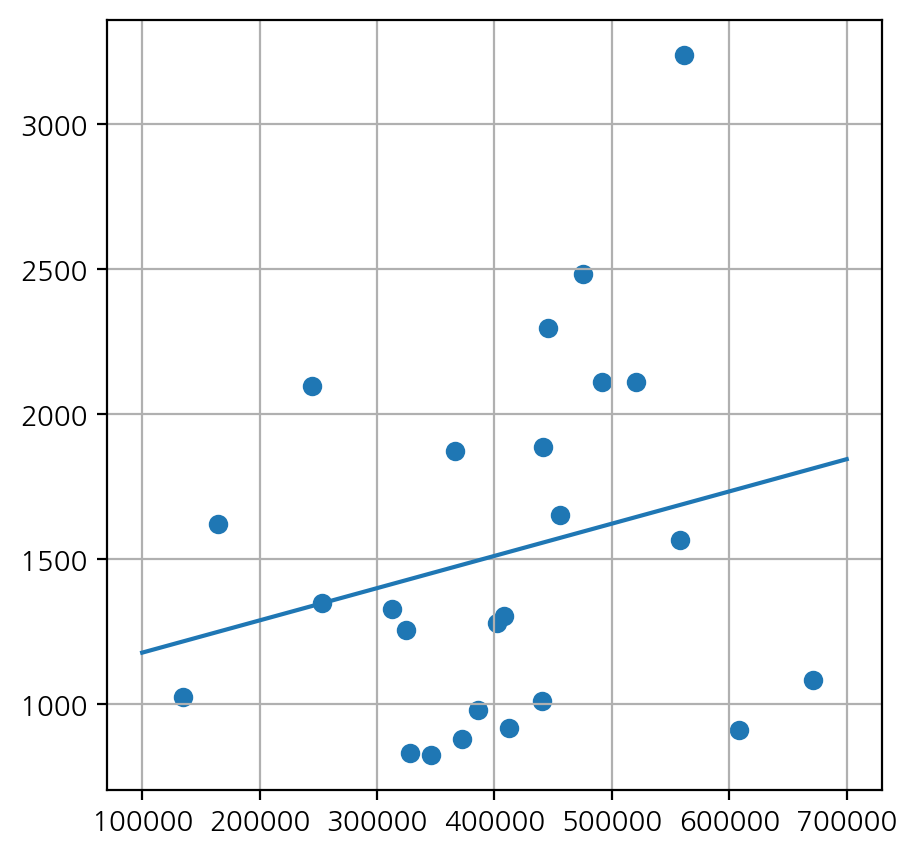

In [155]:
plt.figure(figsize=(5,5))
plt.scatter(data_result['인구수'],data_result['소계'])

plt.plot(new_x,predicted)
plt.grid()
plt.show();

In [158]:
data_result['오차'] = data_result['소계'] - model.predict(x)
data_result.head(1)

,소계,2013년도 이전,2014년,2015년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,,,,
강남구,3238,1292,430,584,150.619195,561052,556164,4888,65060,0.87122,11.596073,0.57713,1549.200326


In [165]:
df_sort_f = data_result.sort_values(by ='오차',ascending=False)
df_sort_t = data_result.sort_values(by ='오차')

In [188]:
data_result.head(3)

,소계,2013년도 이전,2014년,2015년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,,,,
강남구,3238,1292,430,584,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,379,99,155,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,369,120,138,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923


In [168]:
from matplotlib.colors import ListedColormap

In [170]:
color_step = [#151c18,#151c18,#1c151c,#1c151c,#1c151c,#171c15]
len(color_step)


SyntaxError: incomplete input (1016642825.py, line 2)

In [171]:
my_mcap = ListedColormap(color_step)

NameError: name 'color_step' is not defined

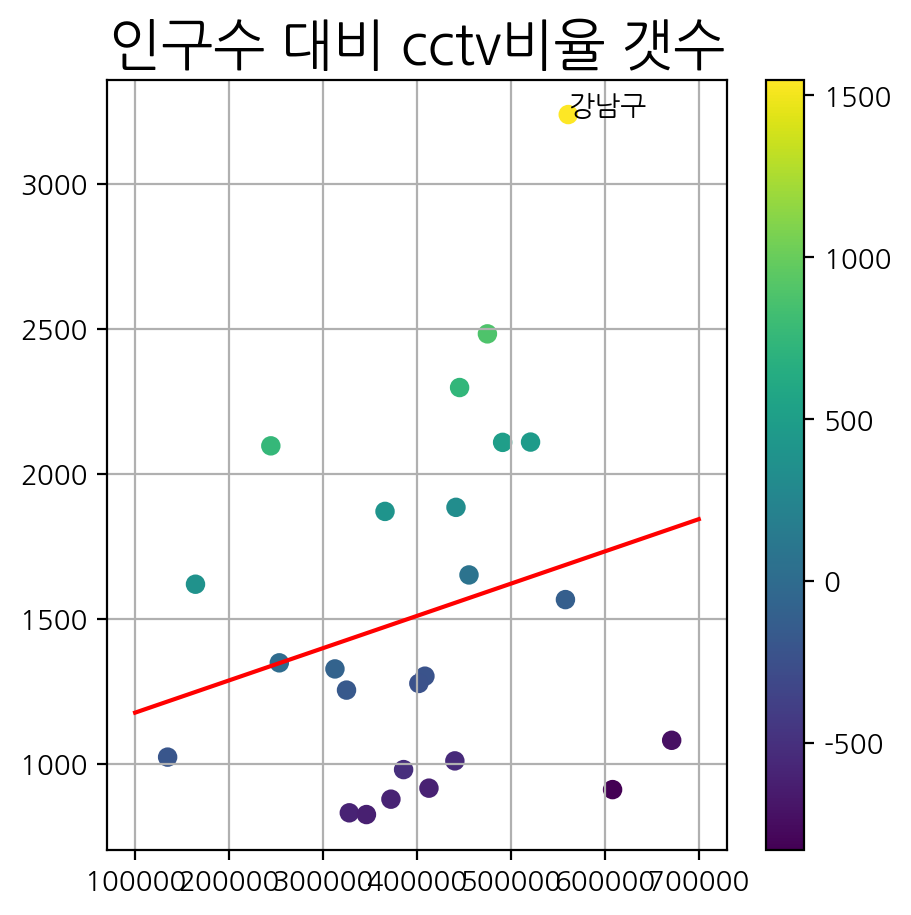

In [187]:

plt.figure(figsize=(5,5))
plt.scatter(data_result['인구수'],data_result['소계'], c= data_result['오차'], )
xlabel = ['인구수 대비 CCTV비율']
ylabel = ['소계']
# cctv 많은곳 5개 적은곳 하위 5개 이름 표현

plt.text(data_result['인구수'][0], data_result['소계'][0], data_result.index[0])
xlabel = data_result['인구수']
ylabel = data_result['cctv비율']
plt.colorbar()
plt.title('인구수 대비 cctv비율 갯수', fontsize = 20)
plt.plot(new_x,predicted, 'r')
plt.grid()
plt.show();

In [224]:
df_sort_f

,소계,2013년도 이전,2014년,2015년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,,,,
강남구,3238,1292,430,584,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,1843,142,30,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,1368,218,112,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,1406,157,336,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,1138,224,278,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700
관악구,2109,846,260,390,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395
동대문구,1870,1070,23,198,74.766355,366011,350647,15364,55718,4.197688,15.223040,0.510914,397.999843
종로구,1619,464,314,211,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651,371.261253
구로구,1884,1142,173,246,64.973730,441559,410742,30817,58794,6.979135,13.315095,0.426670,328.023808


In [225]:
plt.figure(figsize=(5,5))
plt.scatter(data_result['인구수'],data_result['소계'], c= data_result['오차'], )
xlabel = ['인구수 대비 CCTV비율']
ylabel = ['소계']
# cctv 많은곳 5개 적은곳 하위 5개 이름 표현
for idx in range(5)
plt.text(df_sort_f ['인구수'][idx], df_sort_f['소계'][idx], df_sort_f.index[idx]])
for idx in range(5)
plt.text(df_sort_t ['인구수'][idx], df_sort_t['소계'][idx], df_sort_t.index[idx]])






= data_result.sort_values(by ='CCTV비율 많은 곳',ascending=False) #f 내림차순
df_sort_t = data_result.sort_values(by ='CCTV비율 적은 곳')

plt.text(data_result['인구수'][0], data_result['소계'][0], data_result.index[0])
xlabel = data_result['인구수']
ylabel = data_result['cctv비율']
plt.colorbar()
plt.title('인구수 대비 cctv비율 갯수', fontsize = 20)
plt.plot(new_x,predicted, 'r')
plt.grid()
plt.show();

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (642916037.py, line 7)